In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
aqi = pd.read_csv("C:/Users/kdzop/OneDrive/Desktop/DMV pr/City_Air_Quality.csv", encoding="ISO-8859-1", parse_dates=True)
aqi.head()


C:\Users\kdzop\AppData\Local\Temp\ipykernel_8352\1409520453.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  aqi = pd.read_csv("C:/Users/kdzop/OneDrive/Desktop/DMV pr/City_Air_Quality.csv", encoding="ISO-8859-1", parse_dates=True)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})
import warnings 
warnings.filterwarnings('ignore')

In [4]:
aqi.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [5]:
aqi.shape

(435742, 13)

In [6]:
aqi = aqi.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, errors='ignore')

aqi = aqi.dropna(subset=['date'])

In [7]:
# Replace 'Uttaranchal' with 'Uttarakhand' in the 'state' column
aqi.state = aqi.state.replace({'Uttaranchal': 'Uttarakhand'})

# Update the 'state' column to a specific value where the 'location' is 'Jamshedpur'
aqi.state[aqi.location == "Jamshedpur"] = 'Jharkhand'


In [8]:
types = {
"Residential": "R",
"Residential and others": "RO",
"Residential, Rural and other Areas": "RRO",
"Industrial Area": "I",
"Industrial Areas": "I",
"Industrial": "I",
"Sensitive Area": "S",
"Sensitive Areas": "S",
"Sensitive": "S",
np.nan: "RRO"
}
aqi.type = aqi.type.replace(types)

In [9]:
aqi.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [10]:
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [11]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
aqi[VALUE_COLS] = imputer.fit_transform(aqi[VALUE_COLS])

In [12]:
print(aqi.isnull().sum())
aqi.tail()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64


,state,location,type,so2,no2,rspm,spm,pm2_5,date
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,220.78348,40.791467,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,220.78348,40.791467,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,220.78348,40.791467,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,220.78348,40.791467,2015-12-29


In [13]:
def plot_for_state(state_name):
    fig, ax = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle(state_name, size=20)

    # Filter the DataFrame for the specific state
    state_data = aqi[aqi.state == state_name].copy()

    # Ensure 'date' is in datetime format and set as index
    state_data['date'] = pd.to_datetime(state_data['date'], errors='coerce')
    state_data = state_data.dropna(subset=['date'])  # Drop rows with invalid dates
    state_data = state_data.set_index('date')[VALUE_COLS].resample('Y').mean()  # Resample yearly and take mean

    # Plot each pollutant
    state_data['so2'].plot(legend=True, ax=ax[0][0], title="SO2 Levels")
    ax[0][0].set_ylabel("SO2 (μg/m³)")
    ax[0][0].set_xlabel("Year")

    state_data['no2'].plot(legend=True, ax=ax[0][1], title="NO2 Levels")
    ax[0][1].set_ylabel("NO2 (μg/m³)")
    ax[0][1].set_xlabel("Year")

    state_data['rspm'].plot(legend=True, ax=ax[1][0], title="RSPM Levels")
    ax[1][0].set_ylabel("RSPM (PM10 μg/m³)")
    ax[1][0].set_xlabel("Year")

    state_data['spm'].plot(legend=True, ax=ax[1][1], title="SPM Levels")
    ax[1][1].set_ylabel("SPM (PM10 μg/m³)")
    ax[1][1].set_xlabel("Year")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

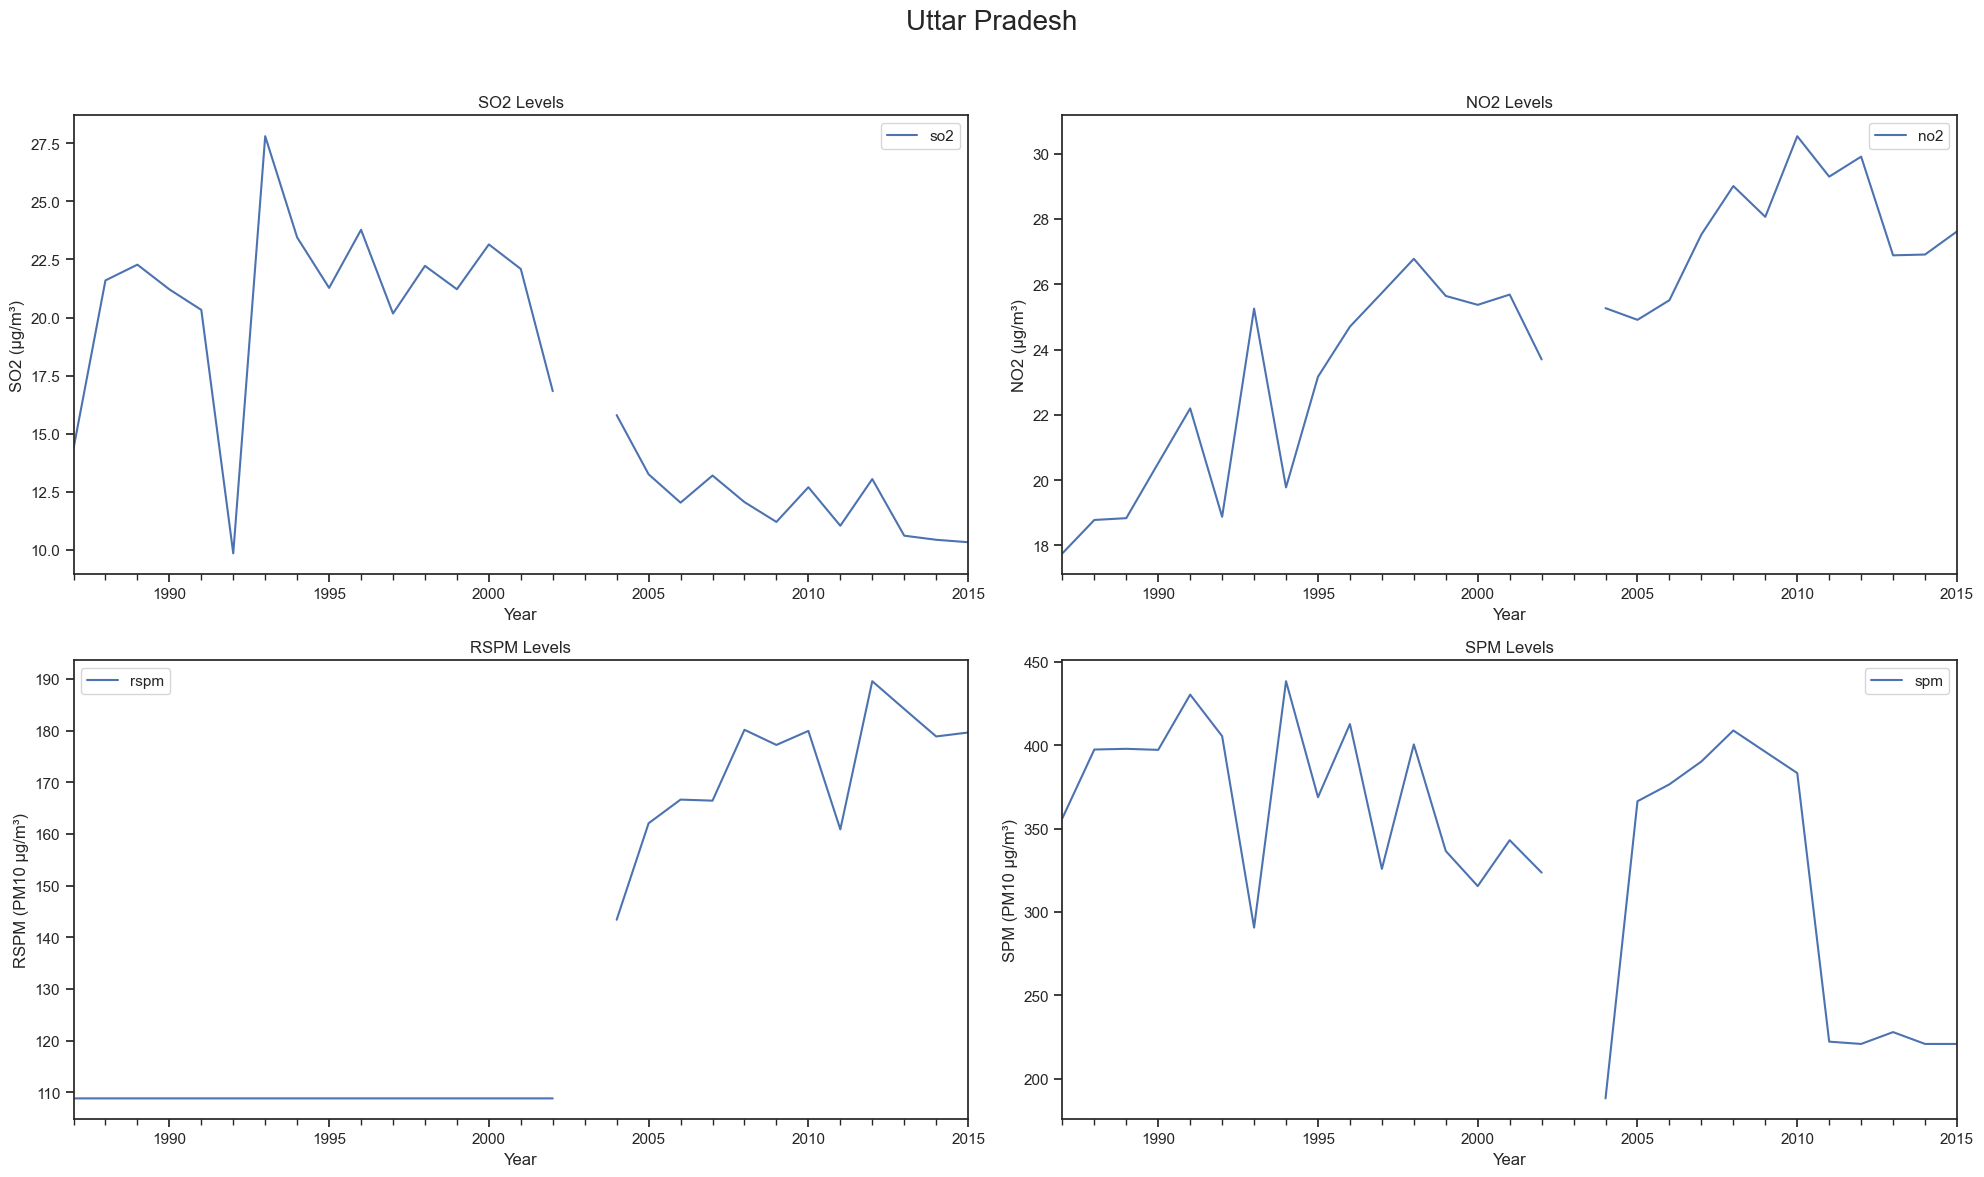

In [14]:
plot_for_state("Uttar Pradesh")

In [15]:
# Defining a function to find and plot the top 10 and bottom 10 states for a specified air quality indicator
def top_and_bottom_10_states(indicator="so2"):
    # Group by state and calculate the median for the specified indicator
    ind = aqi[[indicator, 'state']].groupby('state', as_index=False).median()
    
    # Sort the states by the indicator value
    ind = ind.sort_values(by=indicator)

    fig, ax = plt.subplots(2, 1, figsize=(20, 12))

    # Plot top 10 states
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0])
    top10.set_title("Top 10 States by {} (1991-2016)".format(indicator))
    top10.set_ylabel("{} (μg/m³)".format(indicator.upper()))
    top10.set_xlabel("State")
    top10.set_xticklabels(top10.get_xticklabels(), rotation=45)

    # Plot bottom 10 states
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1])
    bottom10.set_title("Bottom 10 States by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("{} (μg/m³)".format(indicator.upper()))
    bottom10.set_xlabel("State")
    bottom10.set_xticklabels(bottom10.get_xticklabels(), rotation=45)


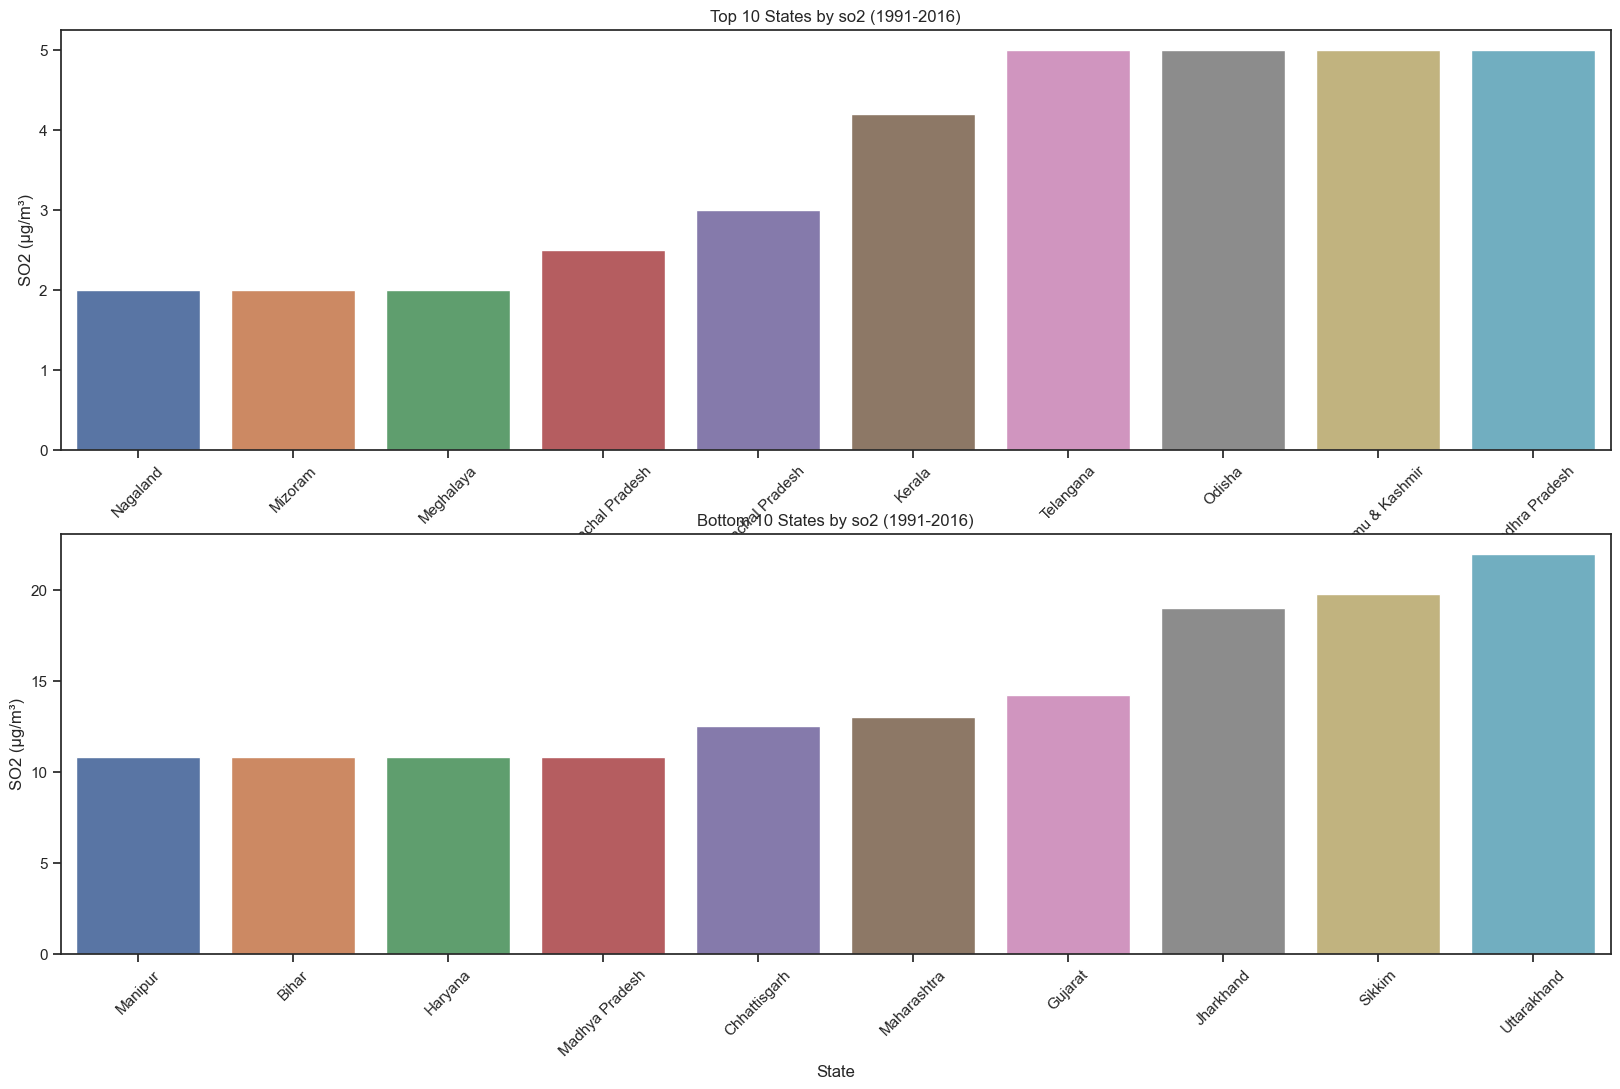

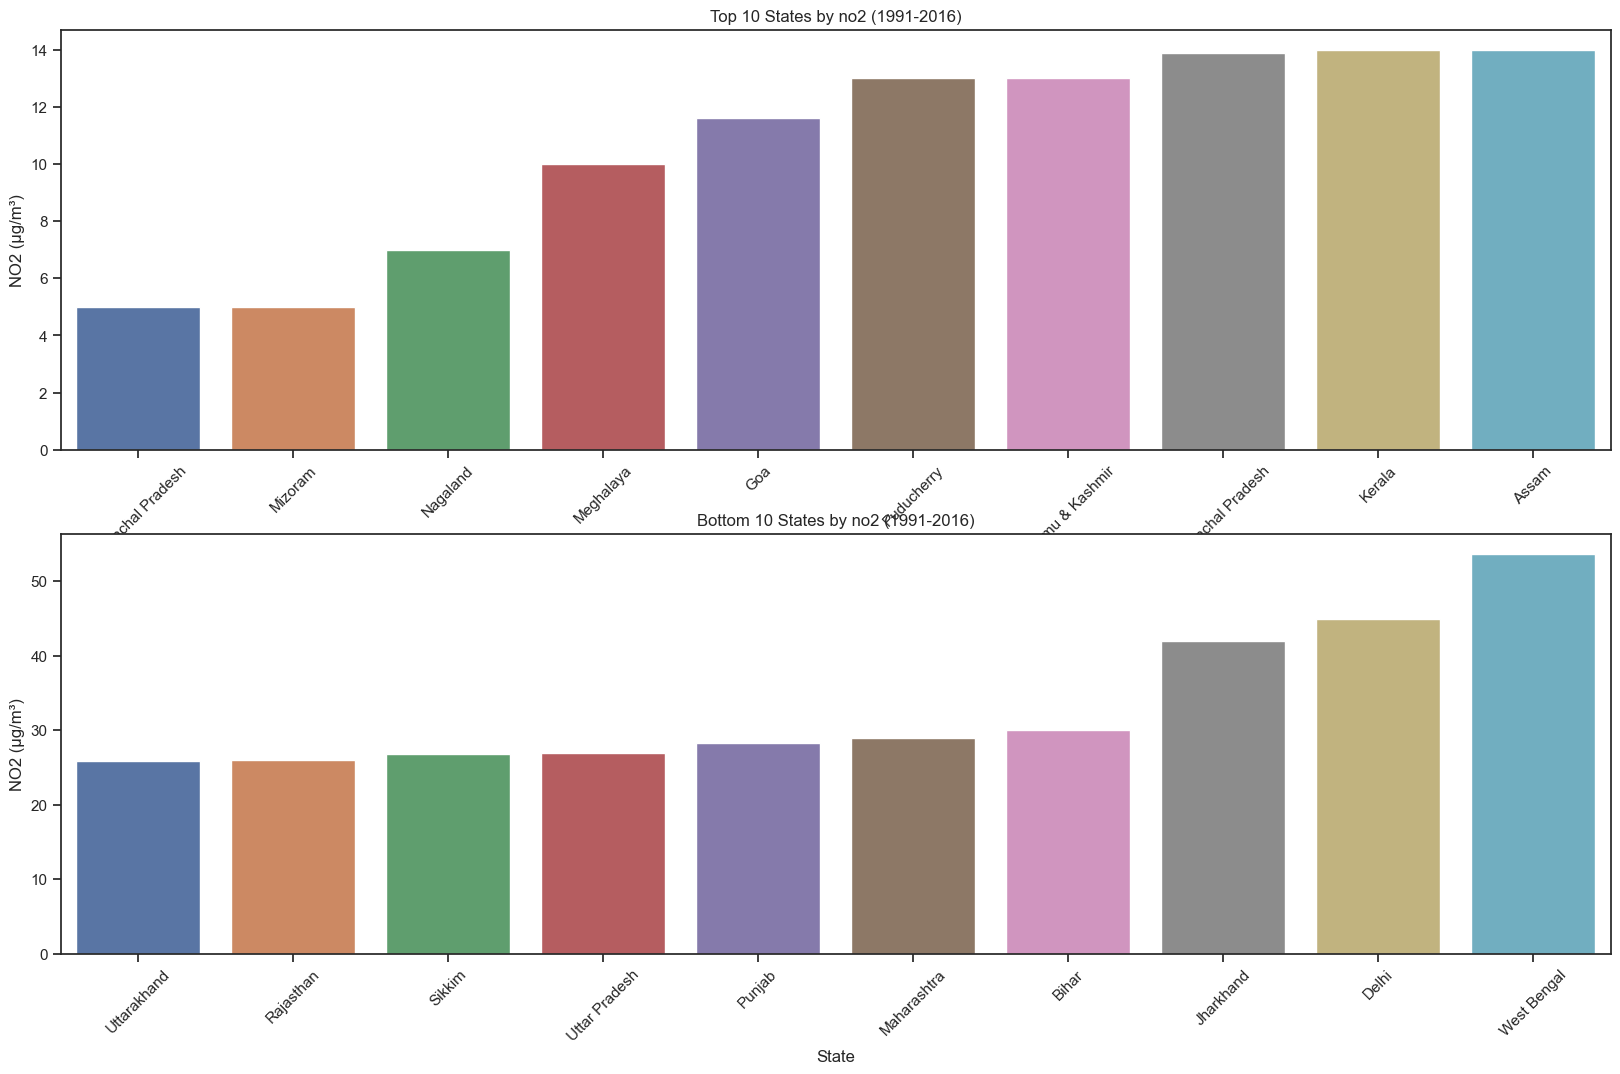

In [16]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

In [17]:
# Defining a function to find the highest ever recorded levels for a given indicator
# Sidenote: This mainly identifies outliers
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20, 10))
    
    # Group by state and get the maximum recorded levels for the specified indicator
    ind = aqi[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    
    # Create a bar plot for the highest levels
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest Ever {} Levels Recorded by State".format(indicator.upper()))
    highest.set_ylabel("{} (μg/m³)".format(indicator.upper()))
    highest.set_xlabel("State")
    plt.xticks(rotation=90) 

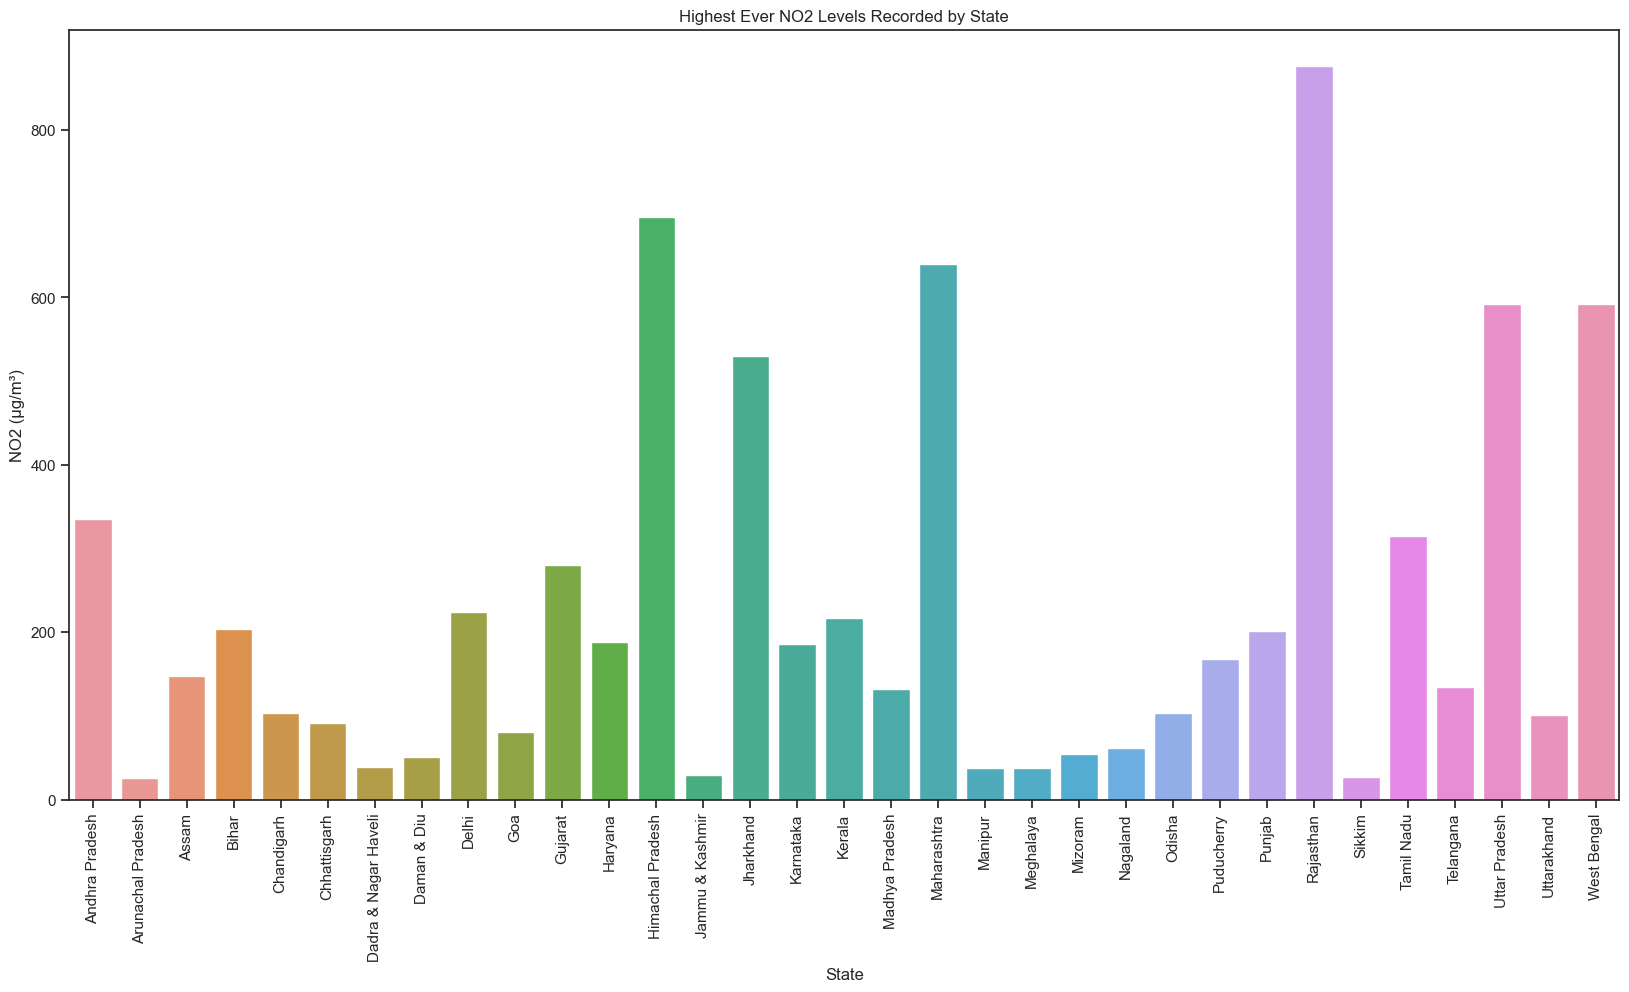

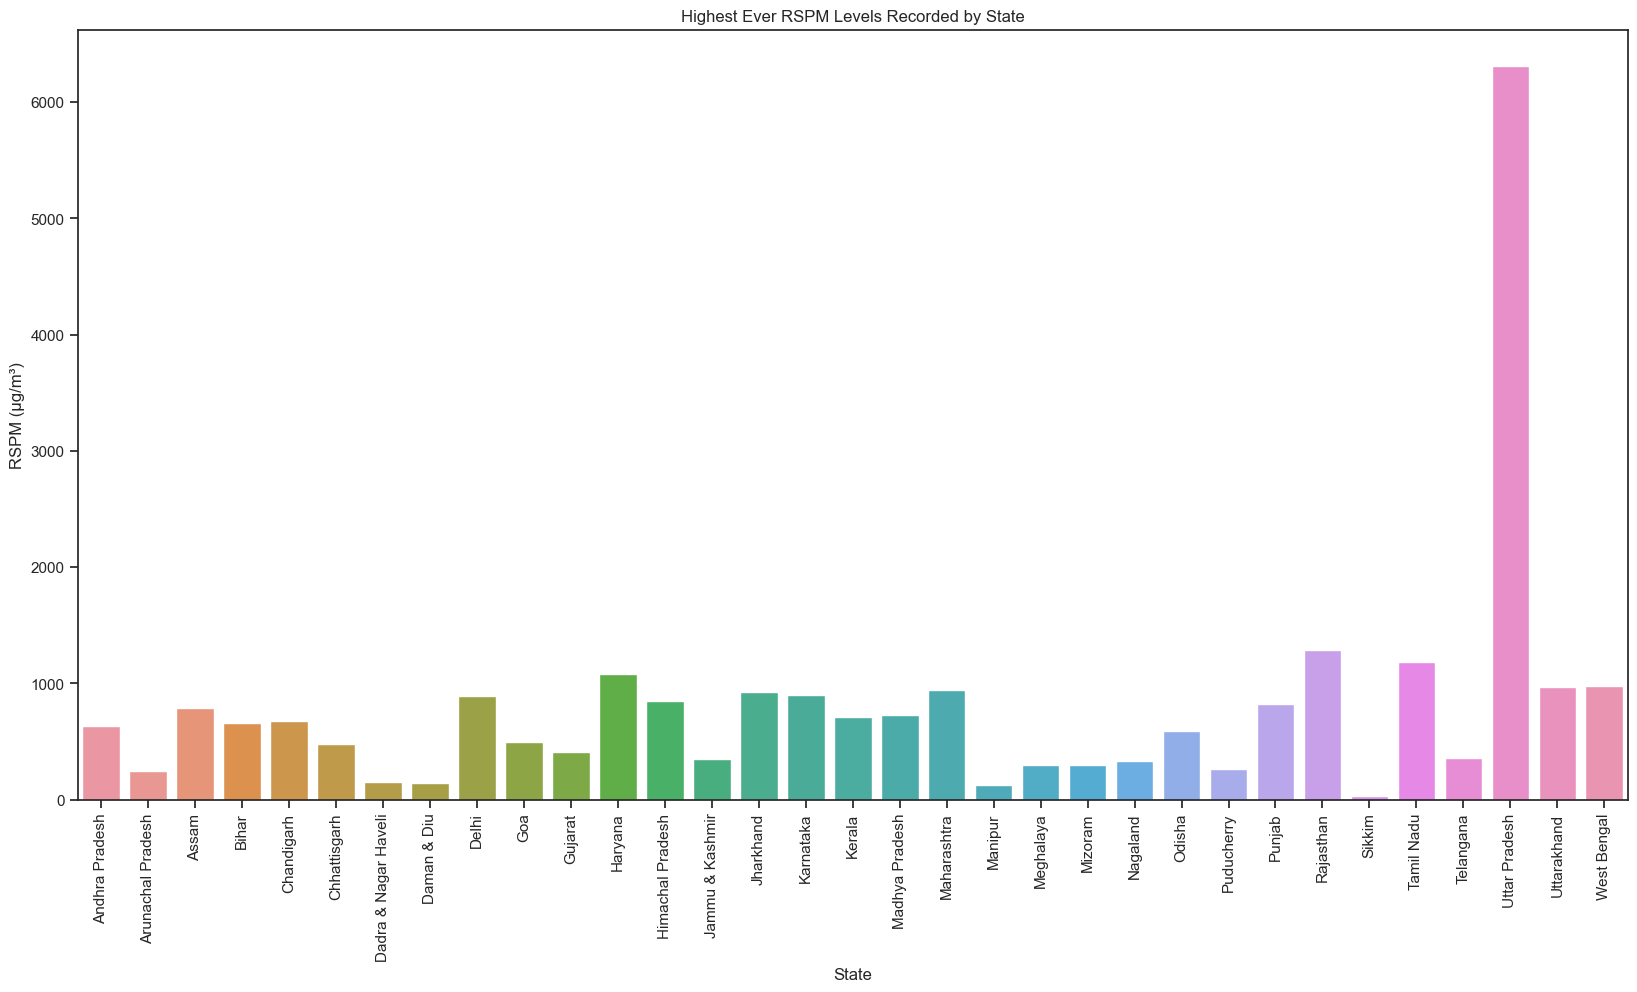

In [18]:
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

In [19]:
def yearly_trend(state="", indicator="so2"):
    # Ensure the 'date' column is in datetime format
    aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce')
    
    # Drop any rows with invalid dates after conversion
    aqi.dropna(subset=['date'], inplace=True)

    # Extract the year from the date column
    aqi['year'] = aqi['date'].dt.year

    plt.figure(figsize=(20, 12))

    # If no specific state is provided, plot the yearly trend across all states
    if state == "":
        year_wise = aqi[[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly Trend of {}'.format(indicator.upper()))
    else:
        # Filter data for the specified state and plot its yearly trend
        year_wise = aqi[aqi['state'] == state][[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly Trend of {} for {}'.format(indicator.upper(), state))

    trend.set_ylabel("{} (μg/m³)".format(indicator.upper()))
    trend.set_xlabel("Year")
    plt.xticks(rotation=45)  

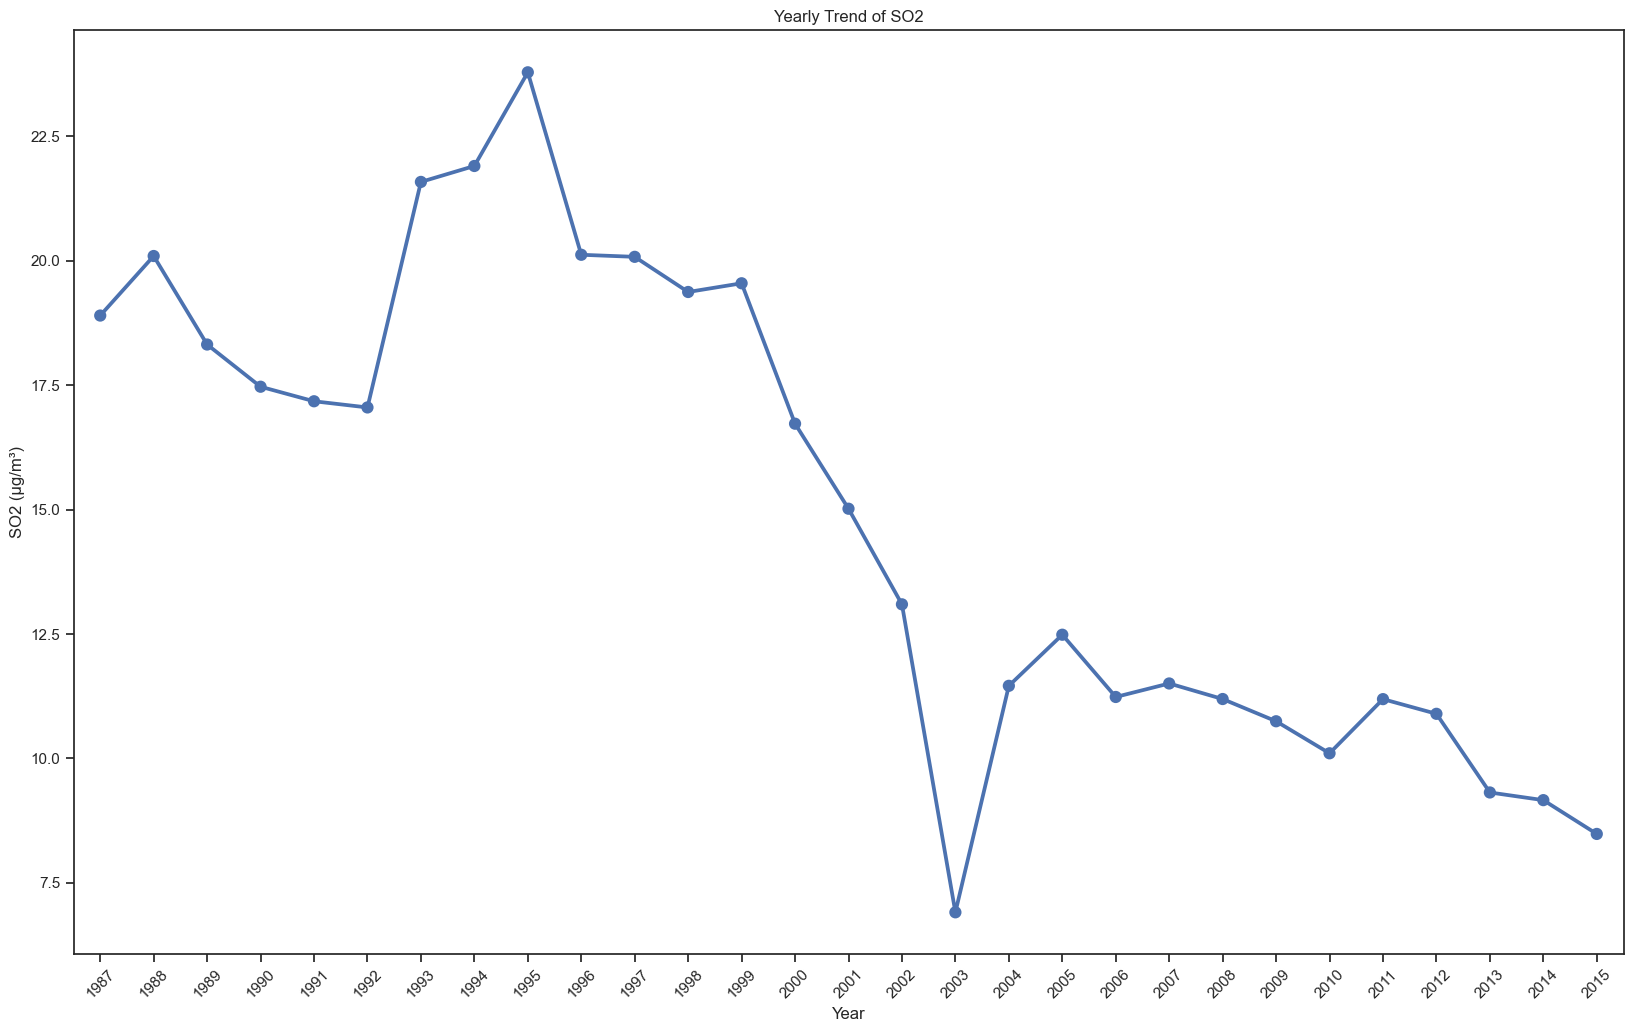

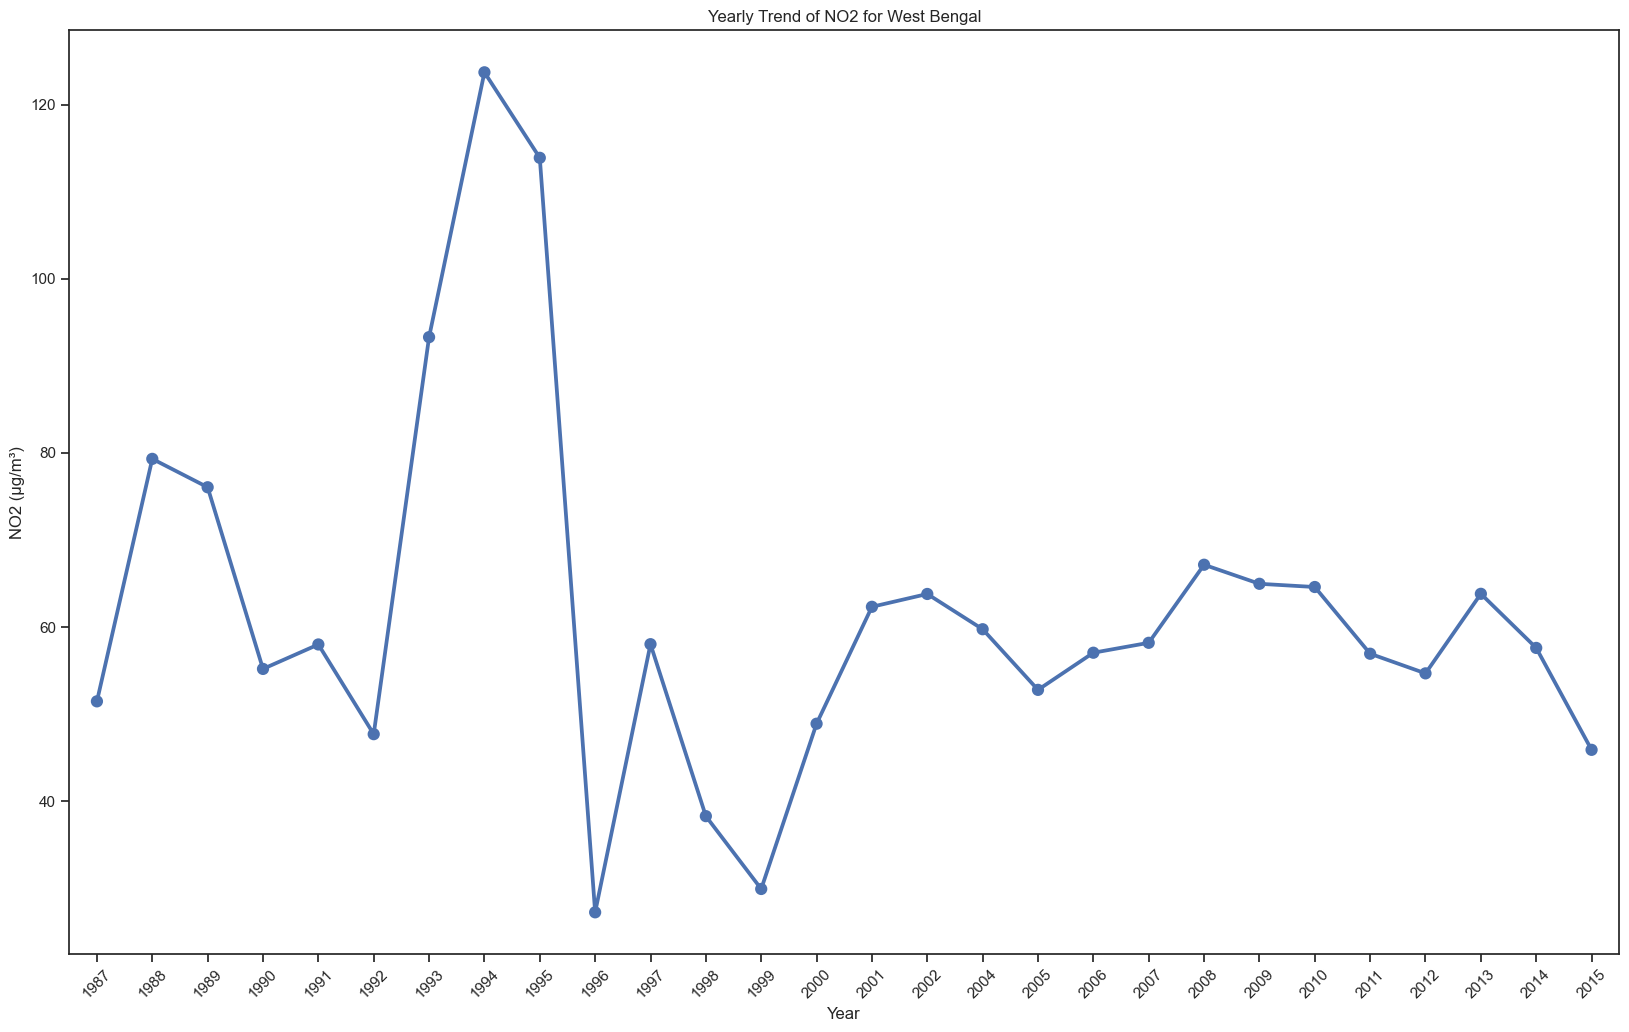

In [20]:
yearly_trend()
yearly_trend("West Bengal", "no2")

In [21]:
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    
    # Ensure the 'date' column is in datetime format and extract the year
    aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce')
    aqi.dropna(subset=['date'], inplace=True)
    aqi['year'] = aqi['date'].dt.year
    
    # Create the heatmap using a pivot table
    hmap = sns.heatmap(
        data=aqi.pivot_table(values=indicator, index='state', columns='year', aggfunc='mean'),
        annot=True, linewidths=.5, cbar=True, square=True, cmap='inferno'
    )
    hmap.set_title("{} by State and Year".format(indicator))


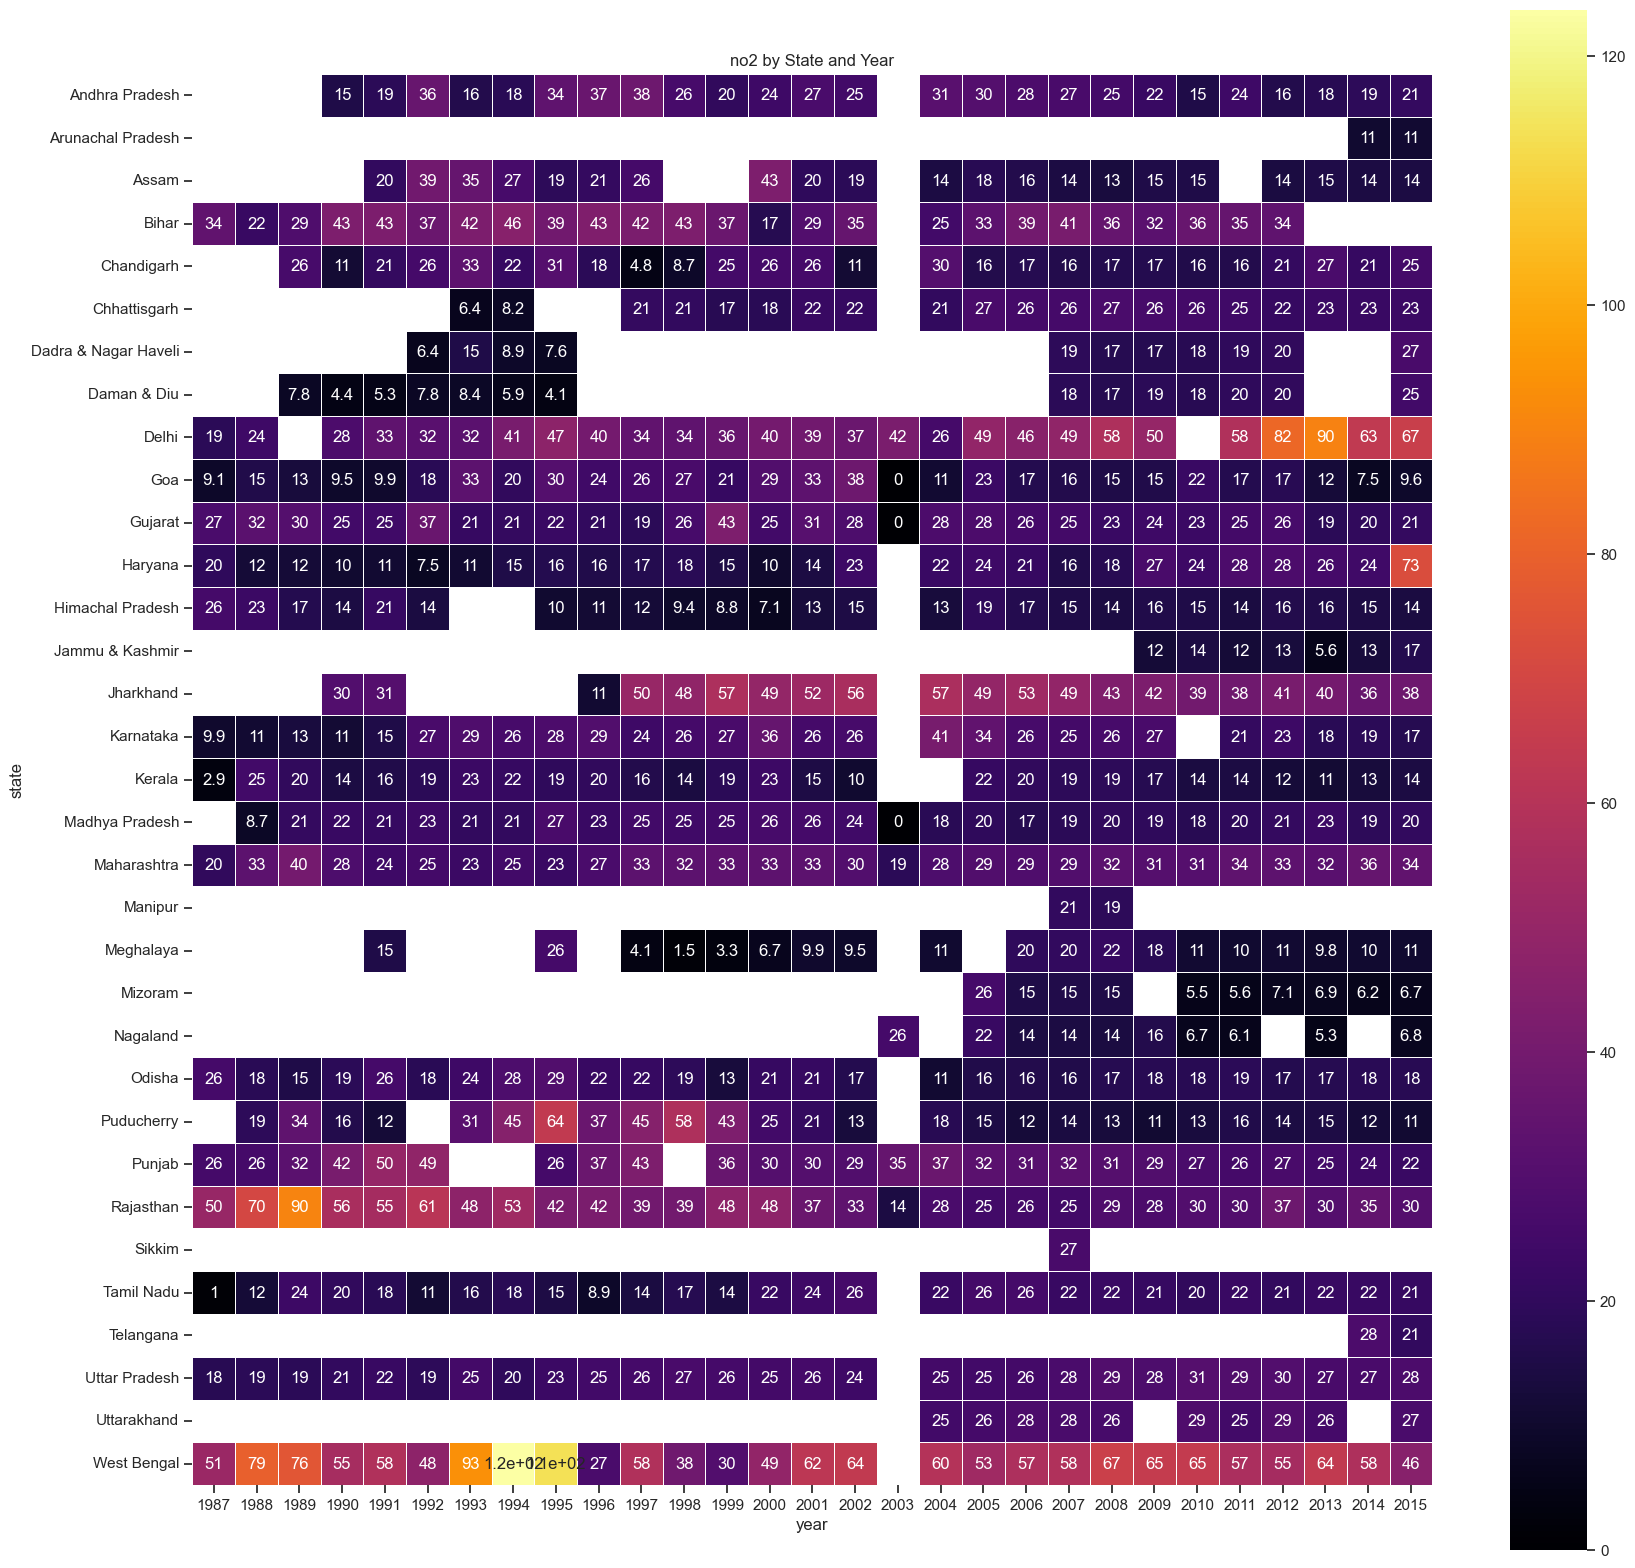

In [22]:
indicator_by_state_and_year('no2')

In [23]:
def type_avg(indicator=""):
    type_avg = aqi[VALUE_COLS + ['type', 'date']].groupby("type").mean()
    if indicator is not "":
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

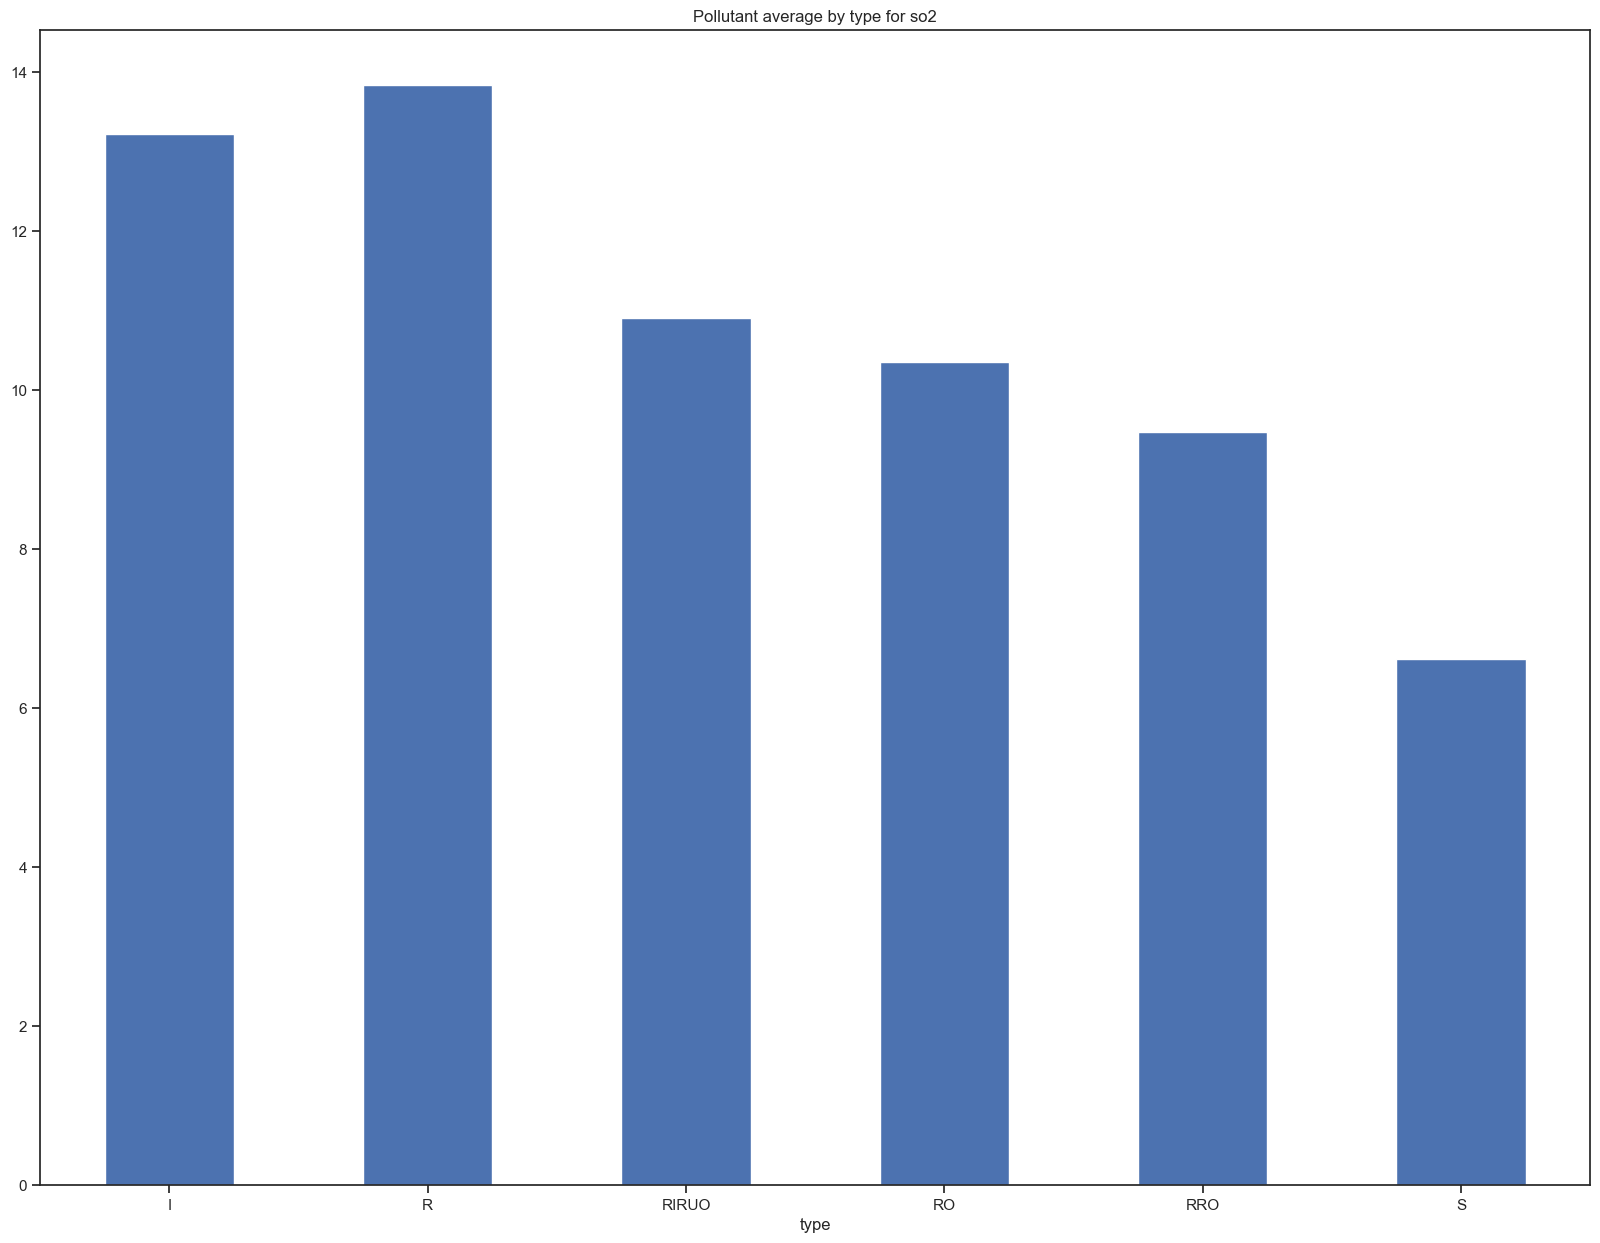

In [24]:
type_avg('so2')

In [25]:
def location_avgs(state, indicator="so2"):
    plt.figure(figsize=(15, 8))
    
    # Group by 'state' and 'location' to calculate the mean of each indicator
    locs = aqi.groupby(['state', 'location'], as_index=False)[indicator].mean()
    
    # Filter the grouped data for the specified state
    state_avgs = locs[locs['state'] == state]
    
    # Plot the barplot for location-wise averages
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise Average for {} in {}".format(indicator.upper(), state))
    plt.xlabel("Location")
    plt.ylabel("{} (μg/m³)".format(indicator.upper()))
    plt.xticks(rotation=90) 

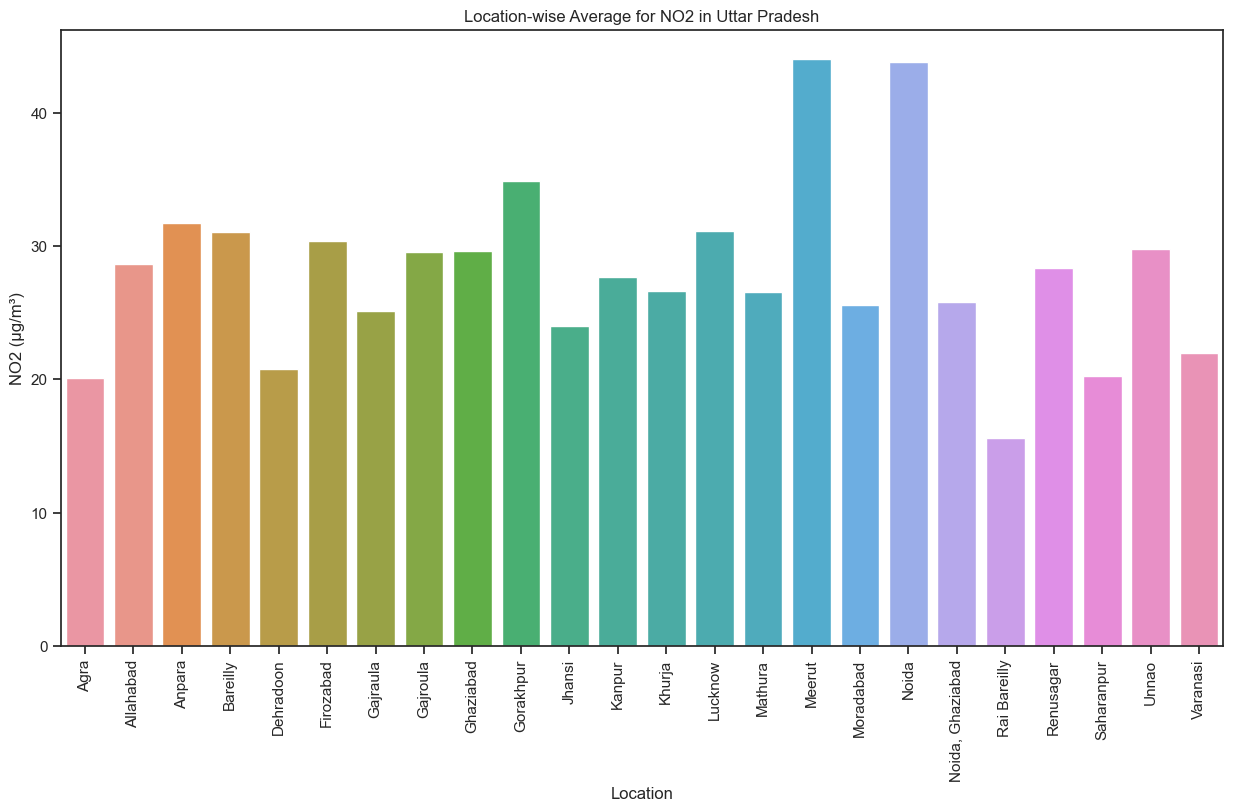

In [26]:
location_avgs("Uttar Pradesh", "no2")